

- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

In [1]:
!nvidia-smi

Sat Jun  3 13:51:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 23.3/166.8 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 79.5MB/s]

2023-06-03 13:51:55.771438: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-03 13:51:55.824296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 13:51:56.706986: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [7]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [8]:
results[0].boxes.conf

tensor([0.72689, 0.28990, 0.28401], device='cuda:0')

In [9]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [10]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

!pip install roboflow

!pip install roboflow

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CTulOTRj2WdFqAswCEWw")
project = rf.workspace("adi-mu6qk").project("f-2bpzh")
dataset = project.version(1).download("yolov8")




/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to f-1 in yolov8:: 100%|██████████| 47120/47120 [00:20<00:00, 2290.80it/s]


## Custom Training

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 batch=16 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 164MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/f-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

In [12]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch12891.jpg
confusion_matrix.png				    train_batch12892.jpg
events.out.tfevents.1685801578.3ad25e4bf01d.8447.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch12890.jpg				    weights


/content


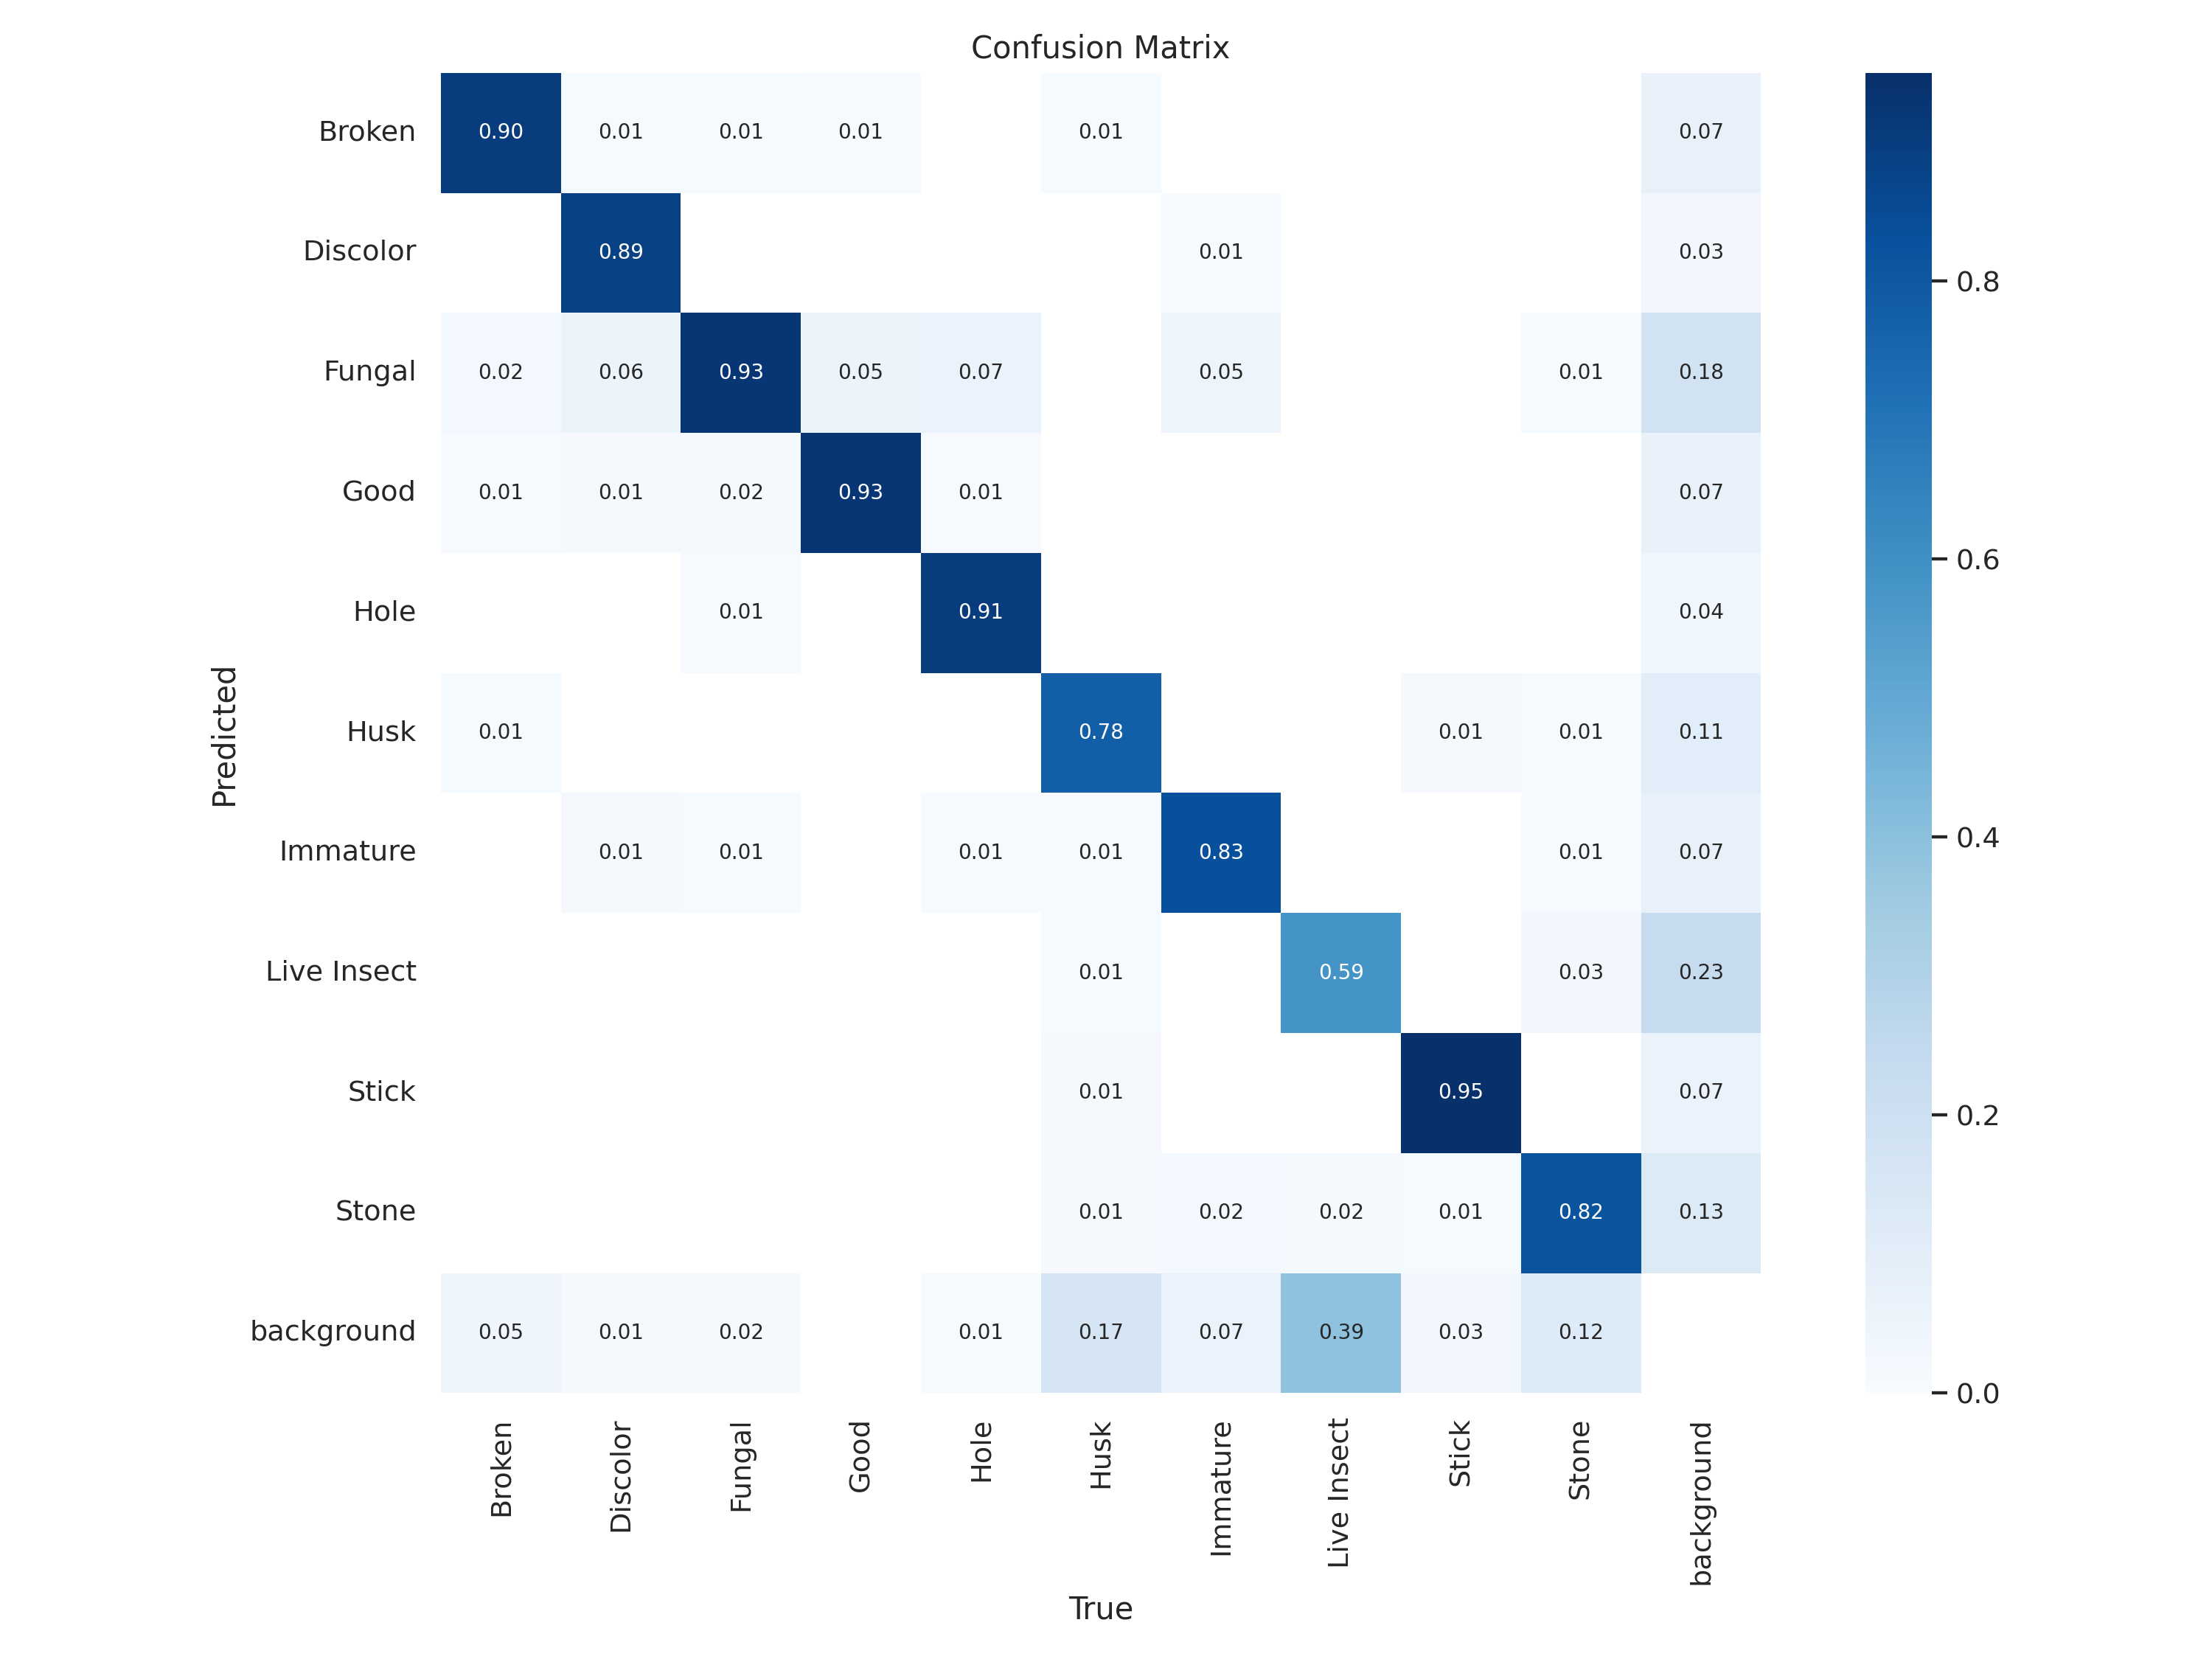

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


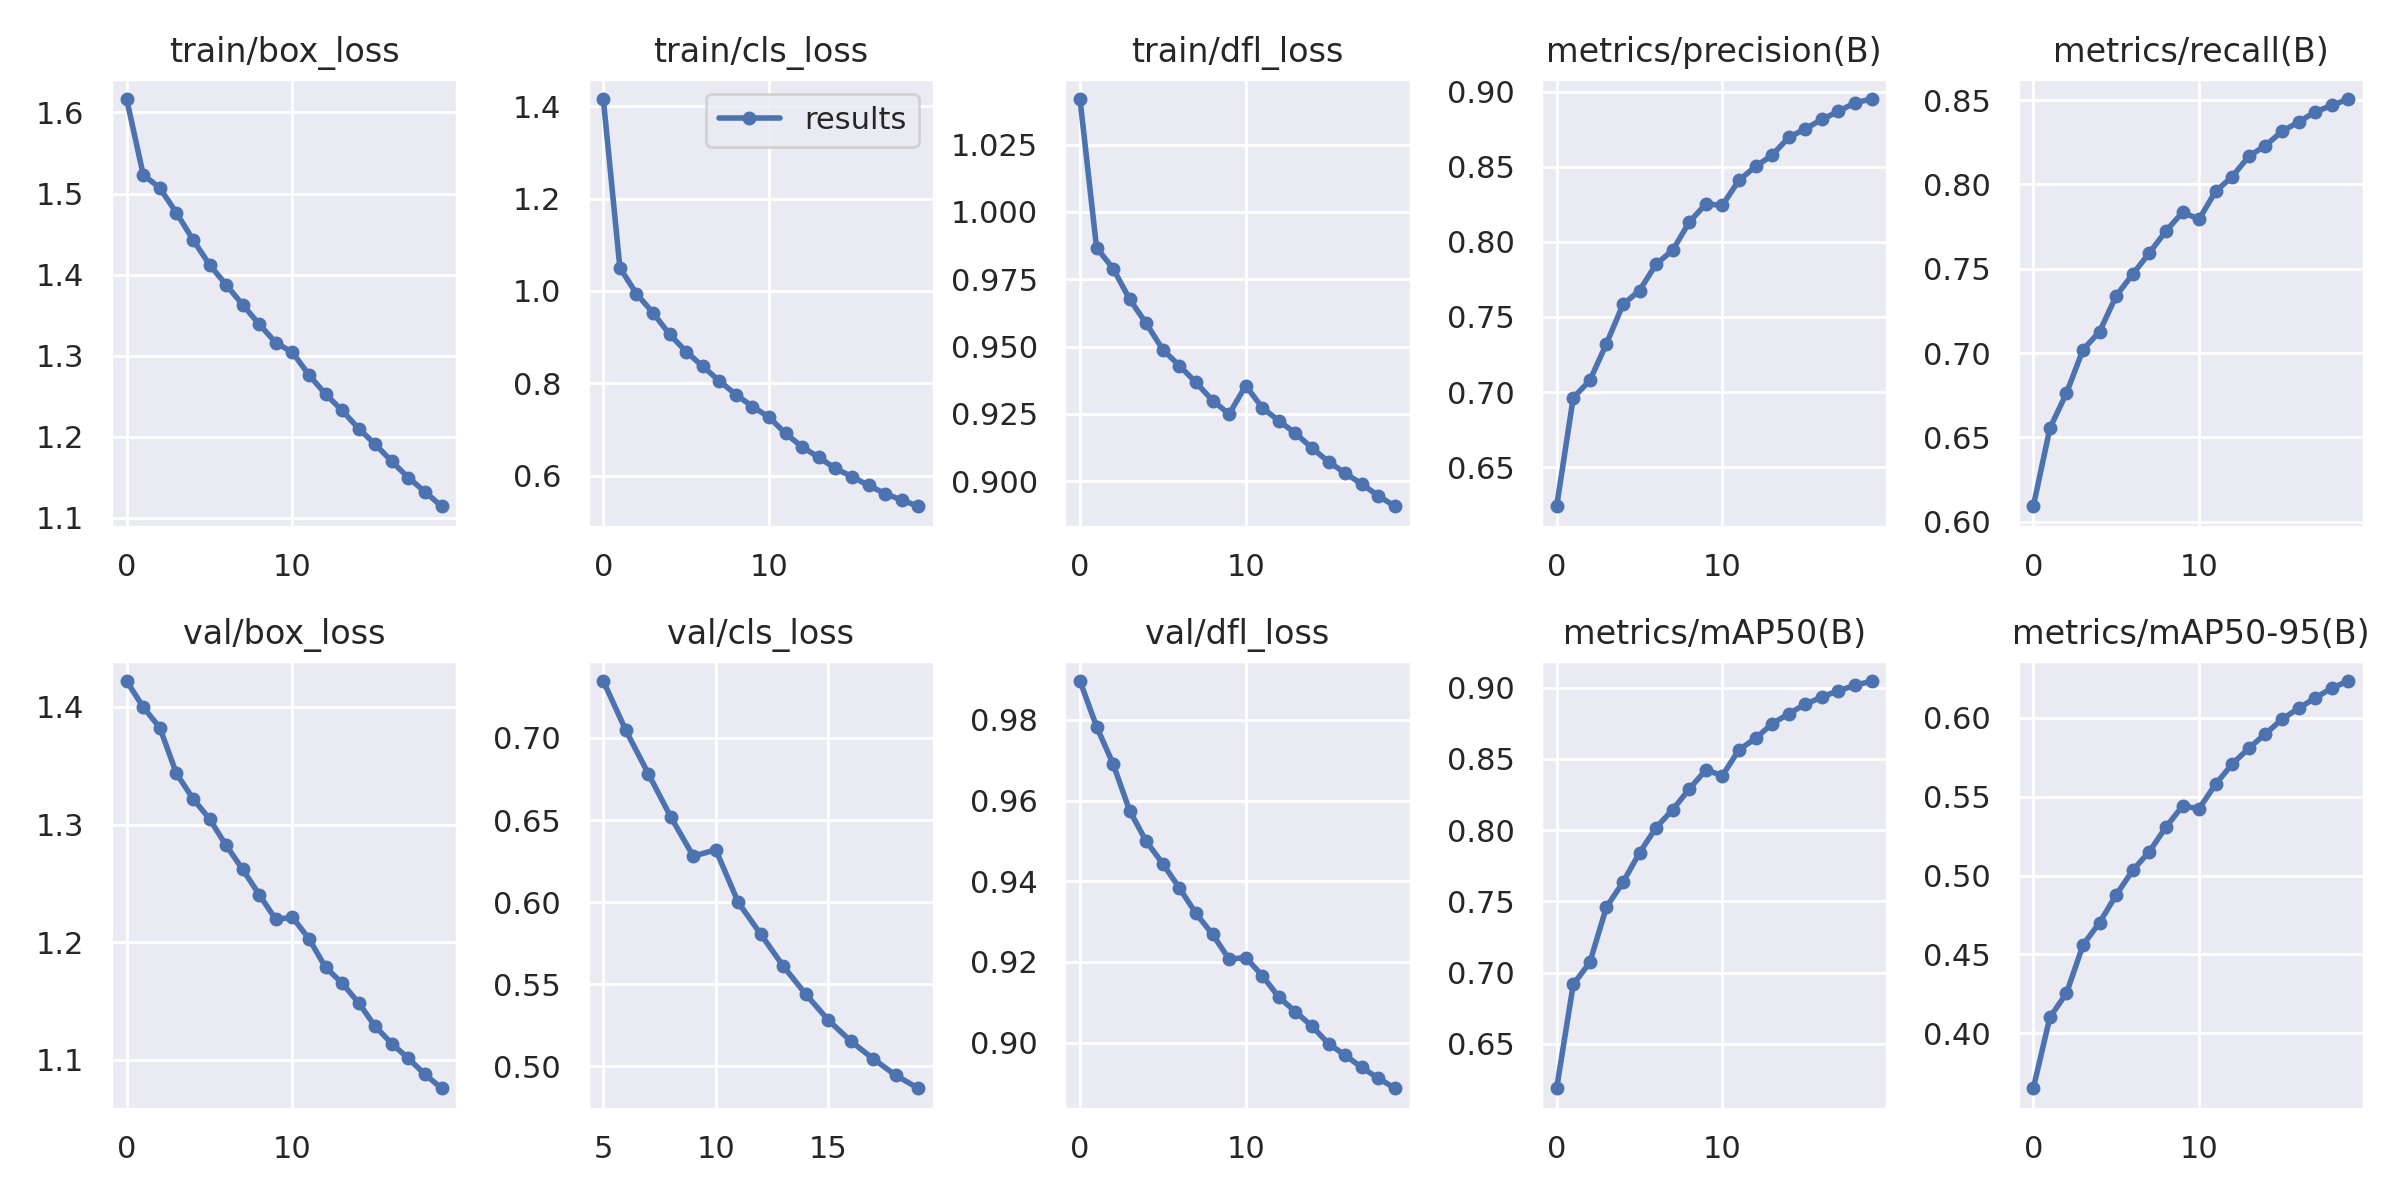

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


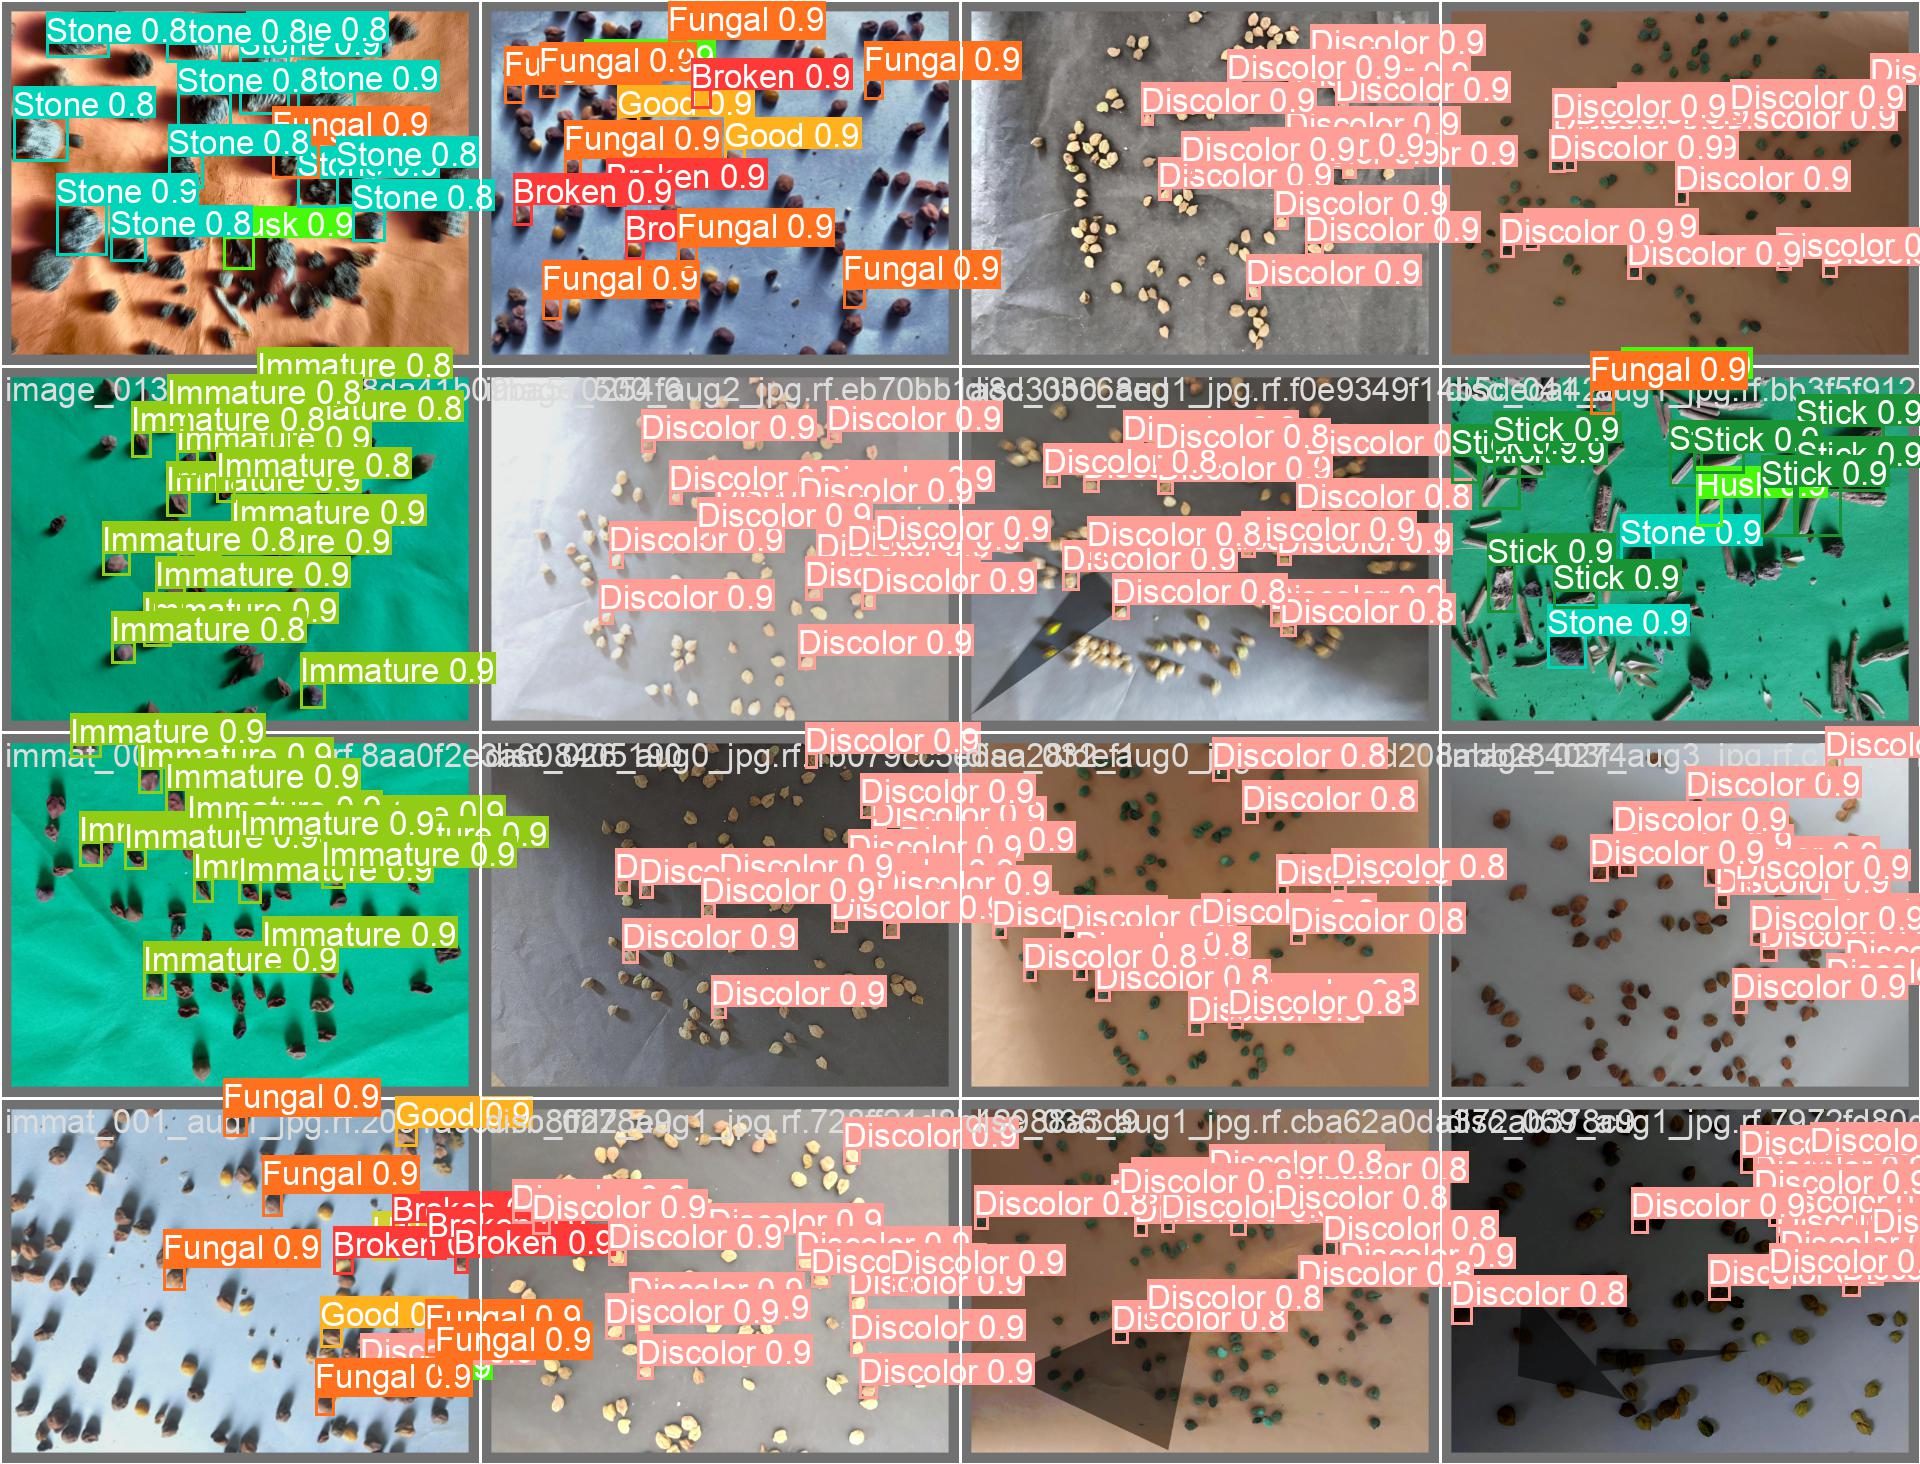

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-03 17:52:23.354262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/f-1/valid/labels.cache... 1956 images, 0 backgrounds, 0 corrupt: 100% 1956/1956 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2% 2/123 [00:12<13:50,  6.86s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2% 3/123 [00:24<18:01,  9.01s/it]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 123/123 [03:22<00:00,  1.64s/it]
                   all       1956     303948      0.895       0.85      0.904      0.625
      

## Inference with Custom Model

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.20 source={dataset.location}/test/images save=True

/content
2023-06-03 17:55:56.885038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
image 1/977 /content/datasets/f-1/test/images/brok_001_aug1_jpg.rf.b6b71162cf98bad887017ffbeb008436.jpg: 640x480 42 Brokens, 117.6ms
image 2/977 /content/datasets/f-1/test/images/brok_002_aug1_jpg.rf.3f638ec130a3fa29bc9e5fa5dbf83334.jpg: 640x480 40 Brokens, 7.0ms
image 3/977 /content/datasets/f-1/test/images/brok_015_aug0_jpg.rf.9eb91f9af49b8bb3e431fe9a5e1449c5.jpg: 640x480 67 Brokens, 6.9ms
image 4/977 /content/datasets/f-1/test/images/brok_027_aug1_jpg.rf.4a160d07067bde024dc416cf3969b006.jpg: 640x480 52 Brokens, 6.9ms
image 5/977 /content/datasets/f-1/test/images/brok_028_aug0_jpg.rf.92c0c9e496ee3696d566e46ecc7959d1.jpg: 640x480 45 Brokens, 7.2ms
image 6/977 /content/datasets

**NOTE:** Let's take a look at few results.

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on IMG_20221205_172140_jpg.rf.0d40843170da91037d7411f64a9572c7.jpg


{'predictions': [{'x': 518.0,
   'y': 471.0,
   'width': 26.0,
   'height': 28.0,
   'confidence': 0.8514558672904968,
   'class': 'Good Toor Dal',
   'image_path': '/content/datasets/Toor-QC-1/test/images/IMG_20221205_172140_jpg.rf.0d40843170da91037d7411f64a9572c7.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 445.5,
   'y': 205.0,
   'width': 29.0,
   'height': 32.0,
   'confidence': 0.8497772216796875,
   'class': 'Good Toor Dal',
   'image_path': '/content/datasets/Toor-QC-1/test/images/IMG_20221205_172140_jpg.rf.0d40843170da91037d7411f64a9572c7.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 317.5,
   'y': 291.0,
   'width': 29.0,
   'height': 28.0,
   'confidence': 0.845653772354126,
   'class': 'Good Toor Dal',
   'image_path': '/content/datasets/Toor-QC-1/test/images/IMG_20221205_172140_jpg.rf.0d40843170da91037d7411f64a9572c7.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 148.5,
   'y': 115.5,
   'width': 29.0,
   'height': 29.0,
   'con